In [35]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MyFirstCSVLoad").getOrCreate()

In [36]:
df = spark.read.csv(
    
    path="dataset/netflix_titles.csv",
    sep=",",
    header=True,
    quote='"',
    inferSchema=True,
)
    

In [37]:
nf = spark.read.csv("dataset/netflix_titles.csv", header=True, inferSchema=True)

conv = nf.toPandas()

conv2 = nf.show(5)
conv2

+-------+-------+-----+-----------------+--------------------+-------------+-----------------+------------+------+---------+--------------------+--------------------+
|show_id|   type|title|         director|                cast|      country|       date_added|release_year|rating| duration|           listed_in|         description|
+-------+-------+-----+-----------------+--------------------+-------------+-----------------+------------+------+---------+--------------------+--------------------+
|     s1|TV Show|   3%|             null|João Miguel, Bian...|       Brazil|  August 14, 2020|        2020| TV-MA|4 Seasons|International TV ...|In a future where...|
|     s2|  Movie| 7:19|Jorge Michel Grau|Demián Bichir, Hé...|       Mexico|December 23, 2016|        2016| TV-MA|   93 min|Dramas, Internati...|After a devastati...|
|     s3|  Movie|23:59|     Gilbert Chan|Tedd Chan, Stella...|    Singapore|December 20, 2018|        2011|     R|   78 min|Horror Movies, In...|When an army recr...

In [38]:
kelompok = nf.groupBy('duration').count()
kelompok.orderBy('count', ascending=False).show(20)

+---------+-----+
| duration|count|
+---------+-----+
| 1 Season| 1607|
|2 Seasons|  381|
|3 Seasons|  184|
|   90 min|  136|
|   93 min|  130|
|   91 min|  125|
|   94 min|  125|
|   95 min|  119|
|   92 min|  118|
|   97 min|  116|
|   96 min|  115|
|   98 min|  106|
|   88 min|  101|
|  103 min|  101|
|   99 min|  101|
|  102 min|   98|
|  106 min|   97|
|  100 min|   97|
|  101 min|   96|
|   86 min|   93|
+---------+-----+
only showing top 20 rows



In [39]:
#mencari daftar durasi

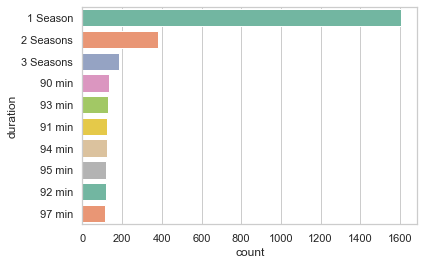

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(figsize=(12,6))
sns.set(style="whitegrid")
ax = sns.countplot(y="duration", data=conv, palette="Set2", order=conv['duration'].value_counts().index[0:10])
plt.show()

In [41]:
#Mencari daftar rating terbanyak

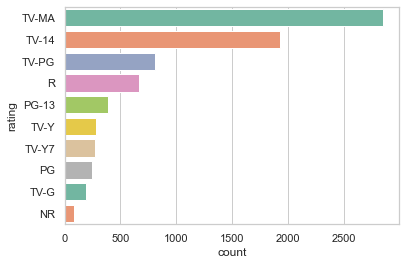

In [63]:
plt.plot(figsize=(12,6))
sns.set(style="whitegrid")
ax = sns.countplot(y="rating", data=conv, palette="Set2", order=conv['rating'].value_counts().index[0:10])
plt.show()